# Mini Project For Phishing Website Dataset

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>

Imported the Following Libraries:
<ul>
    <li> <b>arff</b> from <b>liac_arff</b></li>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
from liac_arff import arff
import pandas as pd
import numpy as np

In [2]:
f = "../Downloads/phishing_dataset.arff"
data = arff.load(open(f, 'r'))

In [3]:
df = pd.DataFrame(data['data'])

In [4]:
header = []
l = len(data['attributes'])
for i in range(l):
    header.append(data['attributes'][i][0])
df.columns = header

In [5]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


In [7]:
X = df.drop(df.columns[-1], axis=1)
Y = df['Result']

<hr>

<div id="feature_selection">
    <h2>Selecting the features</h2>
    I used <b>SelectFromModel</b> from <b>sklearn.feature_selection</b>.
</div>

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.feature_importances_ 
model = SelectFromModel(clf, prefit=True)
print(X.shape)
X_new = model.transform(X)
print(X_new.shape)

(11055, 30)
(11055, 3)


<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    I used <b>train/test split</b> on <b>decision tree</b>. Import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

Now <b> train_test_split </b> will return 4 different parameters and name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [9]:
from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X_new, Y, test_size = 0.3, random_state = 0)
import numpy as np
print(np.shape(X_new))
print(np.shape(X_train))
print(np.shape(X_test))

(11055, 3)
(7738, 3)
(3317, 3)


<hr>

<div id="sCALING">
    <h2>Scaling the features</h2>
    I used <b>StandardScaler</b> from <b>sklearn.preprocessing</b>.
</div>

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    I had first create an instance of the <b>DecisionTreeClassifier</b> called <b>clf</b>.<br>
    Inside of the classifier, I specified <i> max_depth = 3. </i><br> Because, I supposed to train the model for max_depth 3.
</div>

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_new, Y, cv=10)
clf.fit(X_train_std, Y_train) 
y_pred = clf.predict(X_test_std)
print("misclassified samples : %d"%(Y_test!=y_pred).sum())

misclassified samples : 313


<hr>

<div id="prediction">
    <h2>Prediction</h2>
    I made some <b>predictions</b> on the testing dataset and store it into a variable called <b>y_pred</b>.
</div>

In [12]:
clf.predict([[-1, 0, 1]])

array(['1'], dtype=object)

In [13]:
clf.predict_proba([[1, 1, 0]])

array([[0.04070913, 0.95929087]])

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    I imported <b>metrics</b> from sklearn and checked the accuracy of our model.
</div>

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy : %.2f'%accuracy_score(Y_test, y_pred))

Accuracy : 0.91


<hr>

<div id="Testing">
    <h2>Testing</h2>
    Now, I  tested instance of the <b>DecisionTreeClassifier</b> called <b>clf</b> on various max_depth.<br>
    Inside of the classifier, I tested <i> max_depth from 0 to 10 . </i><br> Then, Checked the best accuracy from each instance.
</div>

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth=6, random_state=0)
cross_val_score(clf, X_new, Y, cv=10)
clf.fit(X_train_std, Y_train) 
y_pred = clf.predict(X_test_std)
print("misclassified samples for max depth {} : {}".format(i,(Y_test!=y_pred).sum()))

misclassified samples for max depth 30 : 281


This <b>DecisionTreeClassifier</b> checked on various max_depth.<br>
It gave best accuracy on <b>max_depth = 6.</b><br>
For every instance after max_depth = 6, It starts giving same accuracy.<br>

In [16]:
clf.predict([[-1, 0, 1]])

array(['1'], dtype=object)

In [17]:
clf.predict_proba([[1, -1, 0]])

array([[0.5952381, 0.4047619]])

In [18]:
from sklearn.metrics import accuracy_score
print('Accuracy : %.2f'%accuracy_score(Y_test, y_pred))

Accuracy : 0.92


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Visualized the tree using <b>pyplotplus</b>
</div>

In [19]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [20]:
new = pd.DataFrame(X_new)
import matplotlib.pyplot as plt

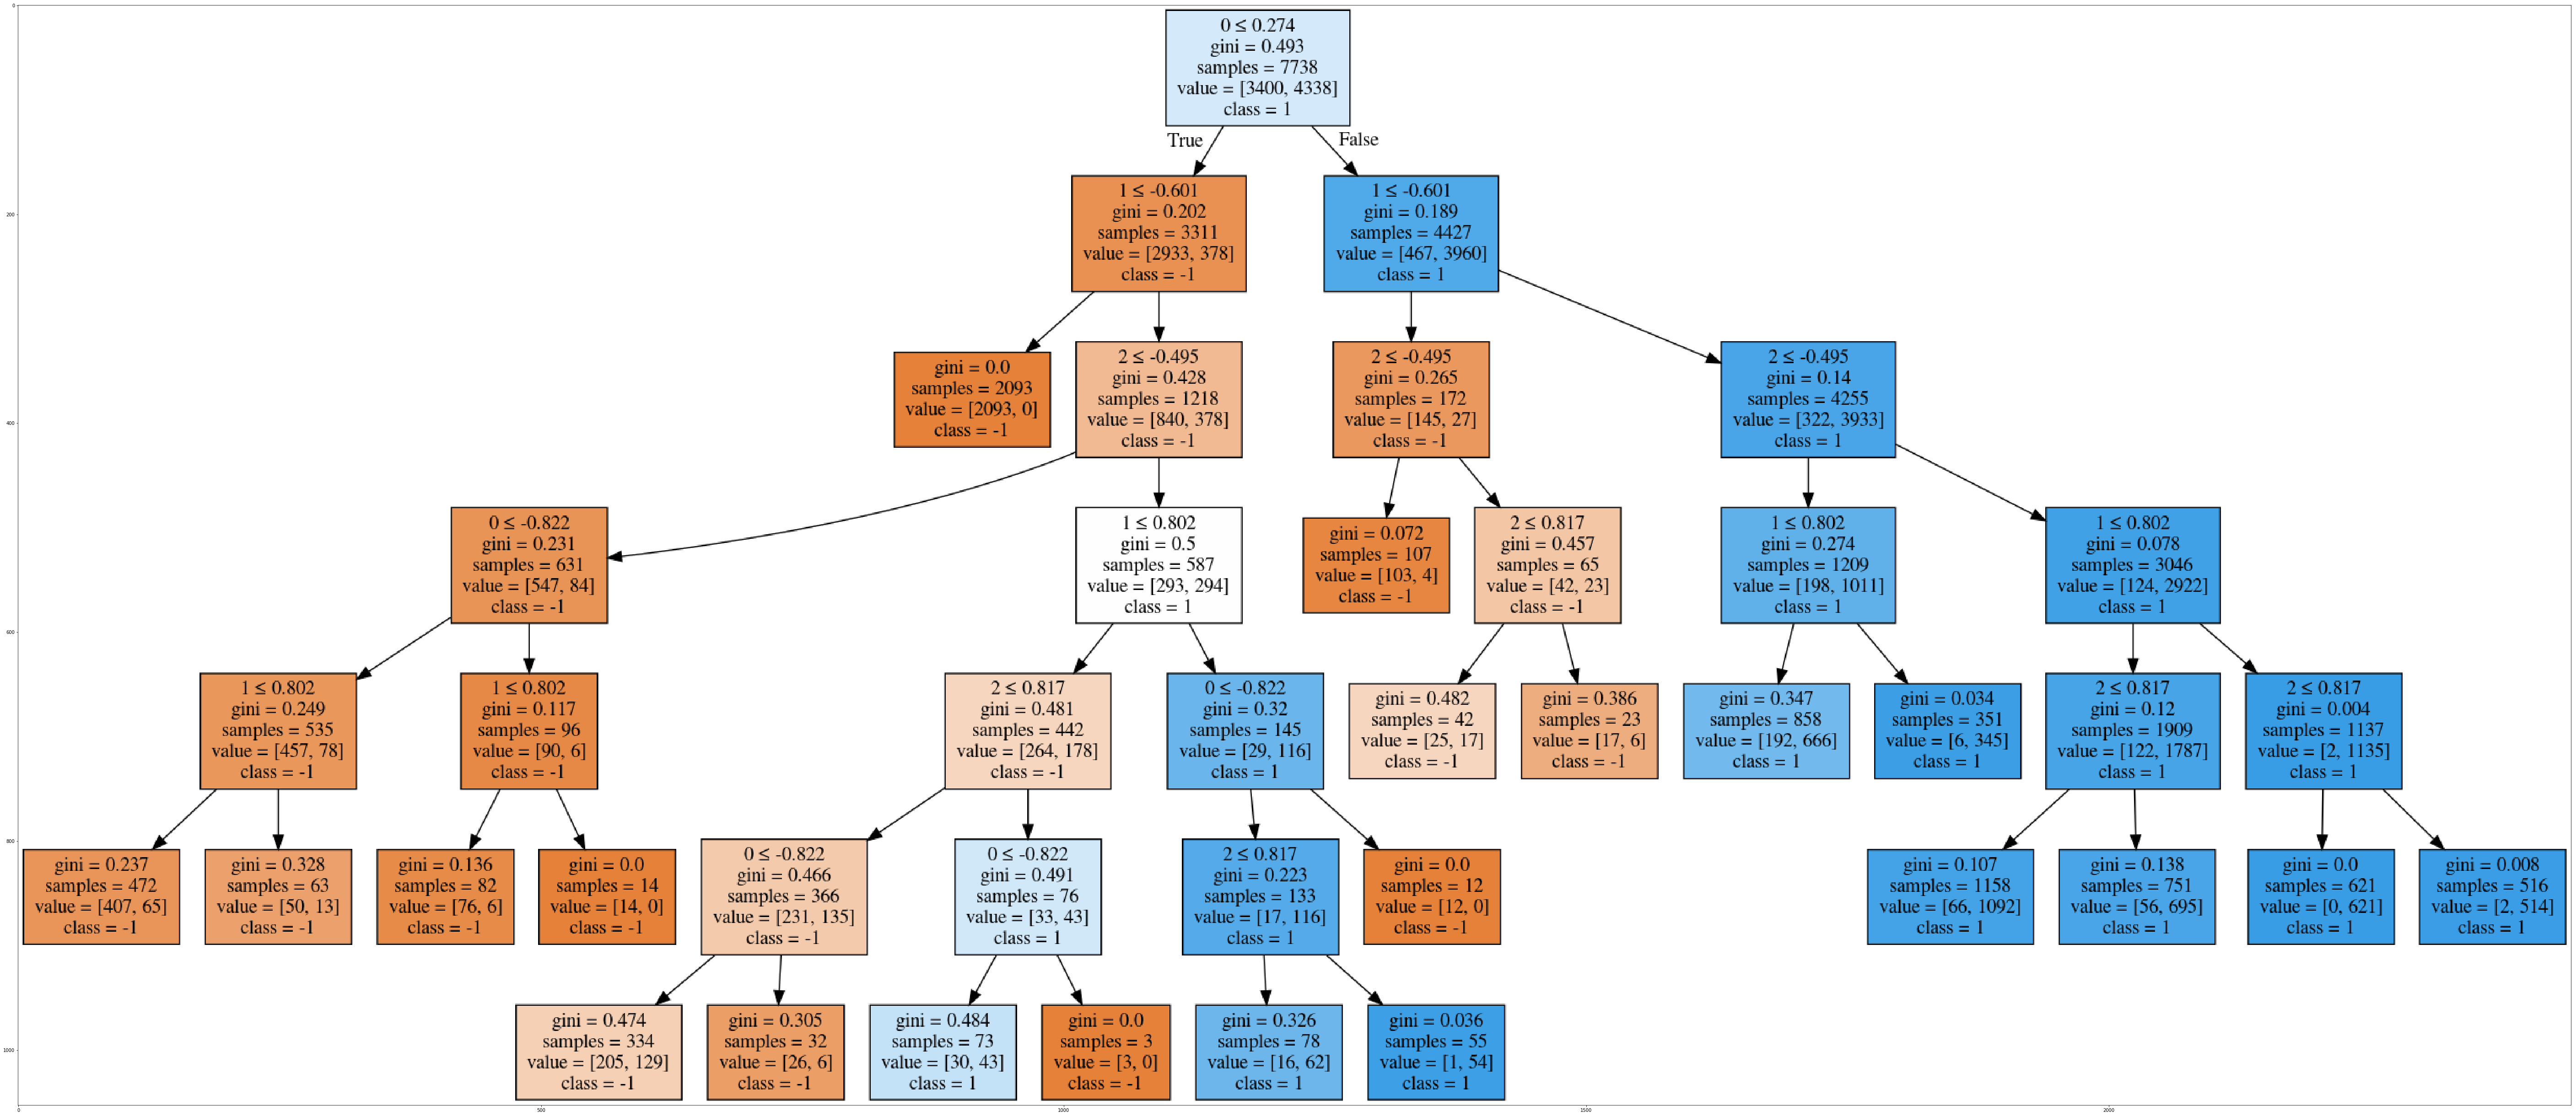

In [24]:
dot_data = StringIO()
filename = "tree.png"
featureNames = new.columns[0:3]
targetNames = Y.unique().tolist()
out=tree.export_graphviz(clf,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')